# Phase V: INFO 2950 Final Project

## The Impact of Remote Work on AI Job Market Salary Hierarchies

**Author:** Angel Gomez (ag2483)


## Introduction And Relevance

As the AI job market continues to grow, it is particularly interesting to analyze the individuals driving this change and the salaries they are given. The rapid expansion of remote work has transformed how AI professionals work, raising questions about whether traditional salary hierarchies based on experience still hold in remote settings, and whether specialized technical roles command different premiums than generalist positions.

This research aims to identify patterns in salary differences based on experience level, role type, and work arrangement. For recent graduates and career changers, understanding how remote work affects salary progression informs critical decisions about career paths and negotiation strategies. For employers, these insights are essential for structuring competitive compensation in an evolving market where remote work and AI specialization reshape traditional pay structures.


***

### Research Question: 

In the US AI job market, does remote work reduce the salary premium traditionally associated with higher experience levels, and do specialized technical roles (Machine Learning Engineers, Research Scientists) show different patterns compared to generalist roles (Data Scientists, Data Analysts)?

**Important Definitions:**

- **Salary premium:** The percentage increase in compensation as workers advance from entry-level to senior-level positions, calculated as (Senior median salary - Entry median salary) / Entry median salary × 100%
- **Specialized roles:** Positions requiring deep machine learning and AI expertise (e.g., Machine Learning Engineer, Research Scientist, Computer Vision Engineer)
- **Generalist roles:** Broader data science and analytics positions (e.g., Data Scientist, Data Analyst, Data Engineer)

***

**Preview of Findings:**

## Data Description and Cleaning 

### Data Description:

**Overview**: 

This analysis uses surveyed salary data from AI and data science jobs postings from the following sites from 2020 - 2025: 

- aijobs.net Salary Dataset (CC0)
- 365datascience.com
- Payscale
- KDnuggets
- ZipRecruiter
- Wellfound (AngelList)

The raw dataset contains 151,445 global job postings across various AI-related roles and was puiled from Kaggle:

Kaggle Link: https://www.kaggle.com/datasets/adilshamim8/salaries-for-data-science-jobs

**Why was this dataset created?**

This dataset was created to provide insight into and understand global AI job market salary trends and employment patterns. This kind of analysis can help influence people's decision-making processes in the job market.


**Who created/funded this dataset?**

This dataset was independently funded by Adil Shamin and published independently on Kaggle in 2025.

**What do the instances repersent and how many are there??**

Each row represents a single job posting or reported position in the AI/data science field. There are a total of 151,445 instances in the raw dataset and 133,972 in the cleaned dataset.


**What are the attributes?**

- `work_year`: Year the position was posted (2025)
- `experience_level`: Entry, Mid, Senior, or Executive
- `job_title`: Specific role title (e.g., "Machine Learning Engineer")
- `role_type`: Categorized as "Specialized" (ML-focused) or "Generalist" (broader data roles) - *created during cleaning*
- `salary_in_usd`: Annual salary in USD
- `remote_ratio`: Percentage of work that is remote (0%, 50%, or 100%)
- `remote_work`: Binary indicator (0 = on-site, 1 = fully remote) - *created during cleaning*
- `company_size`: Small (S), Medium (M), or Large (L)

**Original Raw Columns:**

work_year, job_title, salary, salary_currency, salary_in_usd, experience_level, employment_type, company_location, company_size, employee_residence, remote_ratio


**What might influence what was observed?**

This dataset was created in 2025, so it captures only a single snapshot without historical context. The data was sourced from specific job boards (ai-jobs.net, ZipRecruiter, Payscale, etc.), meaning jobs posted on other platforms aren't included. The dataset also likely overrepresents major tech hubs where these platforms are more popular. Additionally, posted salary ranges may differ from actual negotiated offers. However, given the large dataset size (151,445 entries), these individual quirks likely have minimal impact on overall patterns.

**Were people notified/did they consent?**

No data collection was done in-person. All data collection was scraped from online job boards. Users who uploaded job postings and shared their information were not directly aware of this specific data collection effort, though the information was publicly posted.


***

### Cleaning

Data cleaning was completed in a seperate and independent notebook 

**Cleaning notebook:** 

https://github.com/ag2483-Angel/INFO2950FinalProject/blob/e0c771f5753df01c8edee05bd276e8d7fa59c1b7/data_cleaning.ipynb

**Explanation of Cleaning**
- Checked for duplicates
- Filtered to US employees only
- Filtered to full-time positions only
- Removed hybrid workers (kept only 0% or 100% remote)
- Created binary `remote_work` variable
- Categorized job titles into Specialized vs Generalist roles
- Mapped experience level codes to readable names
- Removed salary outliers using IQR method
- Selected relevant columns for analysis


I will bring in our important imports and cleaned datatset.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
import warnings
warnings.filterwarnings('ignore')

sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 11

df = pd.read_csv('cleaned_salaries.csv')

print(f"Dataset loaded: {df.shape[0]:,} rows, {df.shape[1]} columns")
print(f"\nColumns: {df.columns.tolist()}")
df.head()

Dataset loaded: 131,407 rows, 8 columns

Columns: ['work_year', 'experience_level', 'job_title', 'role_type', 'salary_in_usd', 'remote_ratio', 'remote_work', 'company_size']


,work_year,experience_level,job_title,role_type,salary_in_usd,remote_ratio,remote_work,company_size
0,2025,Executive,Head of Data,Generalist,232344,0,0,M
1,2025,Senior,Data Scientist,Generalist,145400,0,0,M
2,2025,Senior,Data Scientist,Generalist,81600,0,0,M
3,2025,Mid,Engineer,Generalist,160000,100,1,M
4,2025,Mid,Engineer,Generalist,140000,100,1,M


### Data Limitations and Strengths

**Limitations**
Posted salaries may not reflect actual negotiated compensation, which could overstate or understate true market rates. The dataset lacks information on total compensation (equity, bonuses, benefits), meaning our salary comparisons may be incomplete—particularly for senior roles where equity often comprises a significant portion of pay. Without company identifiers, we cannot control for company-specific effects, so observed patterns might reflect which companies hire remote workers rather than remote work's true effect on salaries.

The class imbalance (79% on-site vs 21% remote) may reduce statistical power to detect remote work effects, and any significant p-values should be interpreted cautiously given this imbalance. Additionally, as a single-year snapshot, we cannot determine whether observed patterns are stable trends or temporary market conditions.

**Addressing Limitations:**

To address class imbalance, we include confidence intervals and focus on effect sizes rather than p-values alone. We control for company size in our regression models to partially account for company-level variation. We use median salaries rather than means for descriptive comparisons, which are more robust to the skewed salary distributions common when equity and bonuses are excluded. We also clearly frame our findings as correlational, not causal, and acknowledge in our conclusions what this data can and cannot tell us. Future research could address remaining limitations by incorporating longitudinal data, total compensation figures, and company-level controls.

**Strengths**

Large sample size (133,972 positions), multiple job board sources for broader coverage, standardized USD salary conversions, and recent 2025 data reflecting current market conditions.


### Preregistration Statements 

We preregistered two hypotheses and their analysis plans. This prevents p-hacking and ensures we report findings regardless of statistical significance.

## Preregistration #1: Remote Work and Salary Hierarchies

**Hypothesis:** Remote work reduces the salary premium associated with higher experience levels in the US AI job market. Specifically, the percentage increase in salary from entry-level to senior-level positions will be smaller for fully remote workers compared to on-site workers.

**Null Hypothesis (H₀):** The interaction between experience level and remote work is zero or positive—remote work does not flatten salary hierarchies.

**Alternative Hypothesis (H₁):** The interaction between experience level and remote work is negative—remote workers see smaller salary increases as they gain experience compared to on-site workers.

**Analysis:** Linear regression with salary_in_usd as the dependent variable and experience_level, remote_work, company_size, and the interaction term (experience_level × remote_work) as independent variables. If the interaction coefficients are negative and statistically significant (p < 0.05), this supports the hypothesis that remote work flattens salary hierarchies.

**Addressing class imbalance:** Given the 79% on-site vs 21% remote split, we will report 95% confidence intervals alongside p-values and focus on effect sizes to assess practical significance.

## Preregistration #2: Specialized vs Generalist Role Trajectories

**Hypothesis:** Specialized technical roles (Machine Learning Engineers, Research Scientists) show a steeper salary trajectory across experience levels compared to generalist roles (Data Scientists, Data Analysts), and this difference is more pronounced for on-site workers than remote workers.

**Null Hypothesis (H₀):** There is no significant difference in salary trajectories between specialized and generalist roles.

**Alternative Hypothesis (H₁):** Specialized roles have significantly steeper salary trajectories than generalist roles.

**Analysis:** 
- *Descriptive:* Calculate experience premium ((Senior Median - Entry Median) / Entry Median × 100%) for each of four groups: Specialized On-site, Specialized Remote, Generalist On-site, Generalist Remote.
- *Statistical Test:* Linear regression with salary_in_usd as the dependent variable and role_type, experience_level, remote_work, company_size, and the interaction term (role_type × experience_level) as independent variables. If the interaction coefficient is positive and significant (p < 0.05), specialized roles have steeper trajectories.

**Why this matters:** Understanding whether specialized training pays off differently across work settings informs career planning, educational investment decisions, and employer compensation strategies.

### Exploratory Data Analysis:

I will perform the analyses specified in the preregistration statements. 

**Analysis 1: Remote Work and Salary Hiearchies**

We first examine whether remote work flattens the salary premium associated with experience.


In [7]:
# Calculate experience premiums (Entry to Senior) for on-site vs remote
def calc_premium(data, remote_val):
    subset = data[data['remote_work'] == remote_val]
    entry = subset[subset['experience_level'] == 'Entry']['salary_in_usd'].median()
    senior = subset[subset['experience_level'] == 'Senior']['salary_in_usd'].median()
    premium = (senior - entry) / entry * 100
    return entry, senior, premium

onsite_entry, onsite_senior, onsite_premium = calc_premium(df, 0)
remote_entry, remote_senior, remote_premium = calc_premium(df, 1)

print("Experience Premium (Entry → Senior):")
print(f"  On-site: ${onsite_entry:,.0f} → ${onsite_senior:,.0f} = {onsite_premium:.1f}% increase")
print(f"  Remote:  ${remote_entry:,.0f} → ${remote_senior:,.0f} = {remote_premium:.1f}% increase")
print(f"\nDifference: {onsite_premium - remote_premium:.1f} percentage points")

Experience Premium (Entry → Senior):
  On-site: $95,680 → $167,200 = 74.7% increase
  Remote:  $87,500 → $160,000 = 82.9% increase

Difference: -8.1 percentage points


The premium calculations above show the raw difference between on-site and remote workers. To better understand this pattern, we visualize the full salary trajectory across all four experience levels. If remote work flattens hierarchies, the remote line should be flatter (less steep) than the on-site line.

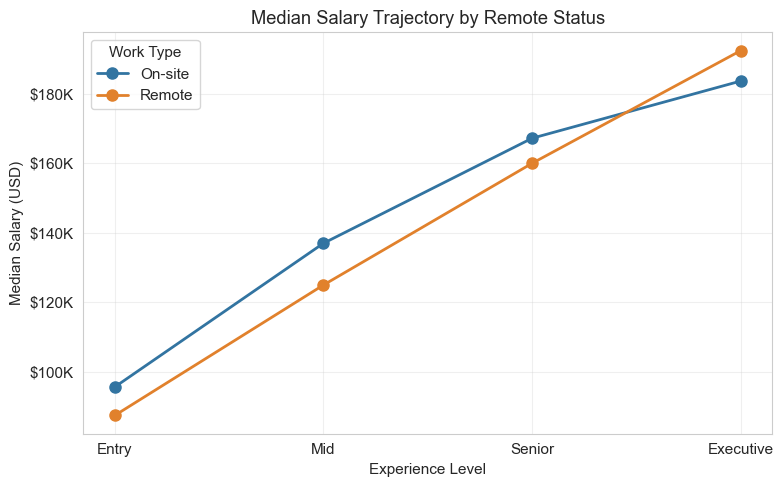

In [8]:
# Visualization: Salary trajectories by remote status
exp_order = ['Entry', 'Mid', 'Senior', 'Executive']

plt.figure(figsize=(8, 5))
for remote_val, label, color in [(0, 'On-site', '#3274A1'), (1, 'Remote', '#E1812C')]:
    medians = df[df['remote_work'] == remote_val].groupby('experience_level')['salary_in_usd'].median()
    medians = medians.reindex(exp_order)
    plt.plot(exp_order, medians, marker='o', linewidth=2, markersize=8, label=label, color=color)

plt.title('Median Salary Trajectory by Remote Status')
plt.xlabel('Experience Level')
plt.ylabel('Median Salary (USD)')
plt.legend(title='Work Type')
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x/1000:.0f}K'))
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

The visualization is useful but we need a formal statistical test to determine if the difference is significant. We run a linear regression with salary as the dependent variable and include an interaction term between experience level and remote work status. We also control for company size as a potential confounder, as larger companies may pay differently and have different remote policies.

The key coefficients to examine are the interaction terms (e.g., Senior × remote_work). A negative coefficient means remote workers receive a smaller salary increase for reaching that level compared to on-site workers—evidence that remote work flattens hierarchies.

In [9]:
model1 = ols('salary_in_usd ~ C(experience_level, Treatment(reference="Entry")) * remote_work + C(company_size)', 
             data=df).fit()

print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:          salary_in_usd   R-squared:                       0.120
Model:                            OLS   Adj. R-squared:                  0.119
Method:                 Least Squares   F-statistic:                     1982.
Date:                Fri, 05 Dec 2025   Prob (F-statistic):               0.00
Time:                        23:22:44   Log-Likelihood:            -1.6260e+06
No. Observations:              131407   AIC:                         3.252e+06
Df Residuals:                  131397   BIC:                         3.252e+06
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                                                                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------

In [13]:

params = model1.params
conf = model1.conf_int()
pvals = model1.pvalues

for level in ['Mid', 'Senior', 'Executive']:
    term = f'C(experience_level, Treatment(reference="Entry"))[T.{level}]:remote_work'
    if term in params:
        coef = params[term]
        ci_low, ci_high = conf.loc[term]
        p = pvals[term]
        sig = "***" if p < 0.001 else "**" if p < 0.01 else "*" if p < 0.05 else ""
        print(f"{level} × Remote: ${coef:,.0f} (95% CI: ${ci_low:,.0f} to ${ci_high:,.0f}), p={p:.4f} {sig}")

Mid × Remote: $-2,350 (95% CI: $-5,694 to $995), p=0.1685 
Senior × Remote: $1,043 (95% CI: $-2,097 to $4,184), p=0.5150 
Executive × Remote: $11,179 (95% CI: $5,700 to $16,658), p=0.0001 ***


**Analysis 2: Specialized vs Generalist Role Trajectories**

Our second hypothesis proposes that specialized roles (Machine Learning Engineers, Research Scientists) have steeper salary trajectories than generalist roles (Data Scientists, Data Analysts). Building on Analysis 1, we now break down the experience premium by both role type and remote status, giving us four groups to compare.

In [10]:
print("Experience Premium (Entry → Senior) by Role Type:\n")

for role in ['Specialized', 'Generalist']:
    for remote_val, work_label in [(0, 'On-site'), (1, 'Remote')]:
        subset = df[(df['role_type'] == role) & (df['remote_work'] == remote_val)]
        entry = subset[subset['experience_level'] == 'Entry']['salary_in_usd'].median()
        senior = subset[subset['experience_level'] == 'Senior']['salary_in_usd'].median()
        if pd.notna(entry) and entry > 0:
            premium = (senior - entry) / entry * 100
            print(f"{role} {work_label}: {premium:.1f}%")

Experience Premium (Entry → Senior) by Role Type:

Specialized On-site: 31.0%
Specialized Remote: 35.5%
Generalist On-site: 78.1%
Generalist Remote: 78.4%


To see the full picture, we visualize salary trajectories for all four groups across experience levels. Steeper lines indicate greater returns to experience. We use solid lines for specialized roles and dashed lines for generalist roles to make comparison easier.

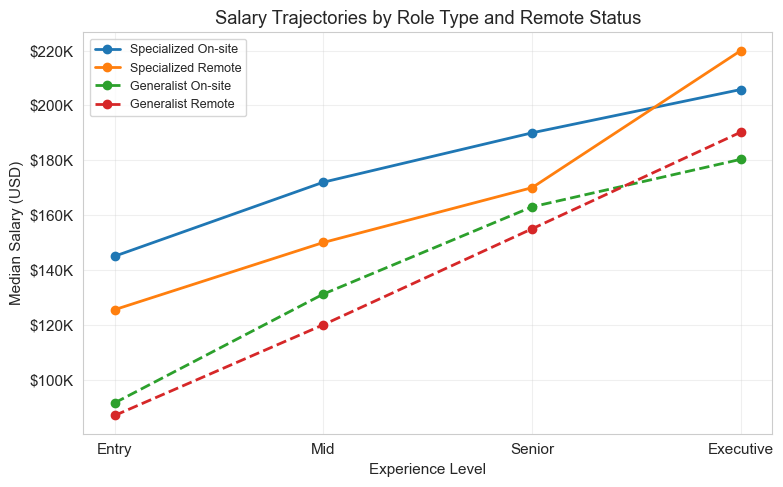

In [11]:
plt.figure(figsize=(8, 5))

for role, style in [('Specialized', '-'), ('Generalist', '--')]:
    for remote_val, color in [(0, '#2E86AB'), (1, '#E1812C')]:
        subset = df[(df['role_type'] == role) & (df['remote_work'] == remote_val)]
        medians = subset.groupby('experience_level')['salary_in_usd'].median()
        medians = medians.reindex(['Entry', 'Mid', 'Senior', 'Executive'])
        label = f"{role} {'On-site' if remote_val == 0 else 'Remote'}"
        plt.plot(['Entry', 'Mid', 'Senior', 'Executive'], medians, 
                marker='o', linestyle=style, linewidth=2, markersize=6, label=label)

plt.xlabel('Experience Level')
plt.ylabel('Median Salary (USD)')
plt.title('Salary Trajectories by Role Type and Remote Status')
plt.legend(fontsize=9)
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x/1000:.0f}K'))
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

Finally, we formally test whether specialized roles have significantly steeper trajectories using a regression with an interaction term between experience level and role type. We continue to control for remote work status and company size. 

A positive interaction coefficient (e.g., Senior × is_specialized) would indicate that specialized workers gain more salary when reaching that level compared to generalist workers—supporting our hypothesis that specialization has steeper returns to experience.

In [12]:
df['is_specialized'] = (df['role_type'] == 'Specialized').astype(int)

model2 = ols('salary_in_usd ~ C(experience_level, Treatment(reference="Entry")) * is_specialized + remote_work + C(company_size)', 
             data=df).fit()

print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:          salary_in_usd   R-squared:                       0.147
Model:                            OLS   Adj. R-squared:                  0.147
Method:                 Least Squares   F-statistic:                     2258.
Date:                Fri, 05 Dec 2025   Prob (F-statistic):               0.00
Time:                        23:24:24   Log-Likelihood:            -1.6239e+06
No. Observations:              131407   AIC:                         3.248e+06
Df Residuals:                  131396   BIC:                         3.248e+06
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                                                                    coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------

In [14]:


params = model2.params
conf = model2.conf_int()
pvals = model2.pvalues

for level in ['Mid', 'Senior', 'Executive']:
    term = f'C(experience_level, Treatment(reference="Entry"))[T.{level}]:is_specialized'
    if term in params:
        coef = params[term]
        ci_low, ci_high = conf.loc[term]
        p = pvals[term]
        sig = "***" if p < 0.001 else "**" if p < 0.01 else "*" if p < 0.05 else ""
        print(f"{level} × Specialized: ${coef:,.0f} (95% CI: ${ci_low:,.0f} to ${ci_high:,.0f}), p={p:.4f} {sig}")

Mid × Specialized: $-20,591 (95% CI: $-24,760 to $-16,421), p=0.0000 ***
Senior × Specialized: $-28,471 (95% CI: $-32,443 to $-24,498), p=0.0000 ***
Executive × Specialized: $-28,577 (95% CI: $-38,123 to $-19,030), p=0.0000 ***
